In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure
%matplotlib inline

In [5]:
#Load in the data from Dexter, so we both use the same train/test datasets
from sklearn.model_selection import train_test_split
dataset_train = pd.read_csv('./oversampled_train.csv', index_col=0)
dataset_test = pd.read_csv('./x_test.csv', index_col=0)
oversampled_data = pd.read_csv('./oversampled_train.csv', index_col=0)

dataset_train = dataset_train.replace({'Index' : { False : 'MSI-L', True : 'MSI-H'}})
dataset_test = dataset_test.replace({'Index' : { False : 'MSI-L', True : 'MSI-H'}})
oversampled_data = oversampled_data.replace({'Index' : { False : 'MSI-L', True : 'MSI-H'}})

x_train = dataset_train.iloc[:, dataset_train.columns != 'Index']
y_train = dataset_train.iloc[:, [0]]

x_test = dataset_test.iloc[:, dataset_test.columns != 'Index']
y_test = dataset_test.iloc[:, [0]]

x_train_oversampled = oversampled_data.iloc[:, oversampled_data.columns != 'Index']
y_train_oversampled = oversampled_data.iloc[:, [0]]

print(x_train_oversampled.shape)
print(y_train_oversampled.shape)

# x_train_oversampled, x_val_oversampled, y_train_oversampled, y_val_oversampled = train_test_split(x_train_oversampled, y_train_oversampled, test_size=0.1, stratify=y_train_oversampled)


(506, 9318)
(506, 1)


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_train_oversampled.shape)
print(y_train_oversampled.shape)

(506, 9318)
(506, 1)
(506, 9318)
(506, 1)


In [7]:
# rf = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [50, 100, 150, 500],
#     'max_depth': [2, 5, 7, 9]
# }
# from sklearn.model_selection import GridSearchCV

# grid_rf = GridSearchCV(rf, param_grid, cv=5)
# grid_rf.fit(x_train, y_train.values.ravel())

In [8]:
# print(grid_rf.best_estimator_)
# print(grid_rf.best_params_)

(131, 9318)
(506, 9318)
(131, 500)
(506, 500)


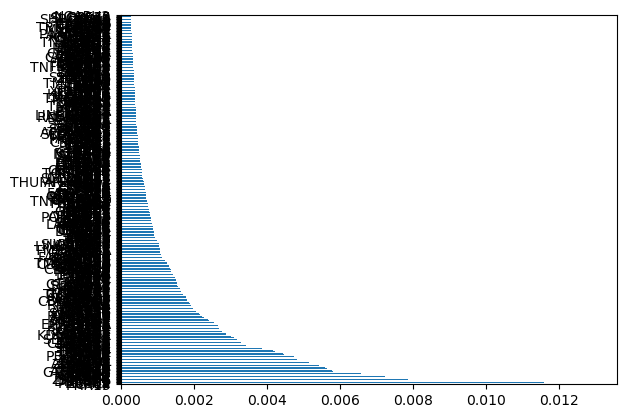

In [9]:
trainedforest = RandomForestClassifier(n_estimators=900).fit(x_train,y_train.values.ravel())
#get the top 500 features
feat_importances = pd.Series(trainedforest.feature_importances_, index= x_train.columns)
feat_importances.nlargest(500).plot(kind='barh')
top_features = feat_importances.nlargest(500).index
#print(top_features)
# print(top_features)
top_features = list(top_features)
#transpose x_train + x_test to get the features as row names again.
x_train = x_train.T
x_test = x_test.T

top_features_list = []
x_train_features_list = []
x_test_list = []

x_train_index = x_train.index
x_test_index = x_test.index

for x in top_features:
    top_features_list.append(x)
for x in x_train_index:
     x_train_features_list.append(x)
for x in x_test_index:
     x_test_list.append(x)

difference_features = set(x_train_features_list).difference(set(top_features_list))
difference_features_list = list(difference_features)

difference_features_test = set(x_test_list).difference(set(top_features_list))
difference_features_list_test = list(difference_features_test)

#remove features from the trainingsset
x_train_tf = x_train[~x_train.index.isin(difference_features_list)]
x_test_tf = x_test[~x_test.index.isin(difference_features_list_test)]


#transpose x_train_tf + x_test_tf
x_train_tf = x_train_tf.T
x_test_tf = x_test_tf.T

#transpose x_train + x_test back to original
x_test = x_test.T
# x_val = x_val.T
x_train = x_train.T
# x_train2 = x_train2.T
from sklearn.preprocessing import StandardScaler
x_train_tf = StandardScaler().fit_transform(x_train_tf)
x_test_tf = StandardScaler().fit_transform(x_test_tf)
print(x_test.shape)
print(x_train.shape)

print(x_test_tf.shape)
print(x_train_tf.shape)

In [10]:
#Write top 500 genes to a file
with open('top_features.txt', 'w') as f:
    for x in top_features:
        f.write(x+"\n")  

In [11]:
#Write top 500 genes to a file with importance
from pathlib import Path  
filepath = Path('top_features_and_importance.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
Top_500 = feat_importances.nlargest(500)
Top_500.to_string()
print(Top_500)

Top_500 = list(zip(Top_500,top_features))
Top_500 = pd.DataFrame(Top_500,columns=["Importance","Feature_Name"])
print(x)
Top_500.to_csv('Top_features.csv', index=False, header=False)      

PRR15      0.012938
CRCP       0.011682
PLAGL2     0.011587
HSPH1      0.010211
AXIN2      0.008818
             ...   
SHROOM1    0.000282
SLC25A4    0.000281
RPL30      0.000281
SLC35F5    0.000280
NCAPH2     0.000279
Length: 500, dtype: float64
NCAPH2


0.9901184236070666
[[253   0]
 [  7 246]]


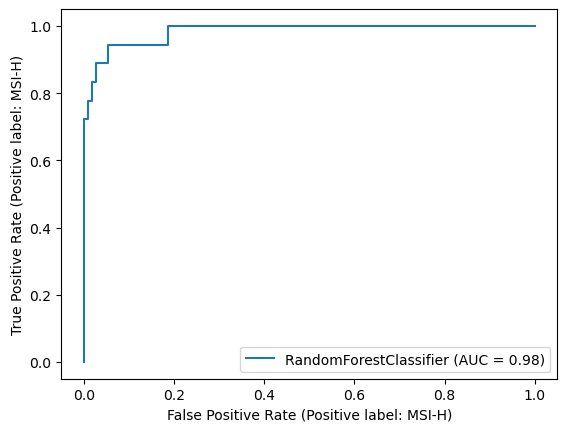

0.9541984732824428


In [13]:
#random forest with oversampling only
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
#x_train_oversampled and y_train_oversampled are made with the oversampled dataset from Dexter! I just loaded them in!!!!

rf = RandomForestClassifier(n_estimators=900, max_depth=6)
rf.fit(x_train_oversampled, y_train_oversampled.values.ravel())
print(np.mean(cross_val_score(rf, x_train_oversampled, y_train_oversampled.values.ravel(), cv=5)))
y_pred_rf = cross_val_predict(rf, x_train_oversampled, y_train_oversampled.values.ravel(), cv=5)
conf_mat_rf = confusion_matrix(y_train_oversampled.values.ravel(), y_pred_rf)
print(conf_mat_rf)
rf_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test,pos_label='MSI-H')
plt.show()
prediction = rf.predict(x_test)
print(accuracy_score(y_test, prediction))

In [14]:
# ax = plt.gca()
# rf_disp = RocCurveDisplay.from_estimator(rf, x_val, y_val, ax=ax, alpha=0.8)
# rf_disp.plot(ax=ax, alpha=0.8)
# plt.show()

0.9822170452339352


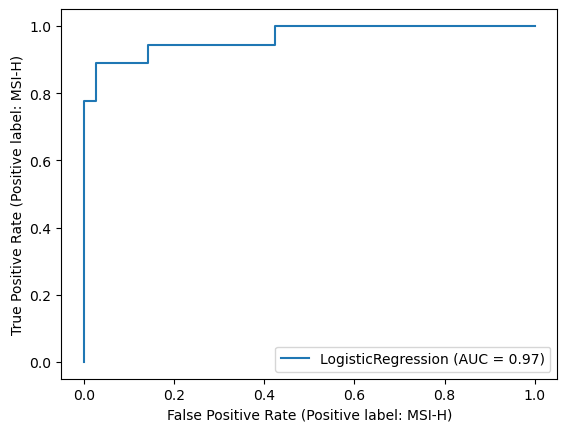

0.9541984732824428


In [21]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0, max_iter=1000, solver='lbfgs').fit(x_train_oversampled, y_train_oversampled.values.ravel())
print(np.mean(cross_val_score(lg, x_train_oversampled, y_train_oversampled.values.ravel(), cv=5)))
lg_disp = RocCurveDisplay.from_estimator(lg, x_test, y_test,pos_label='MSI-H')
plt.show()

prediction = rf.predict(x_test)
print(accuracy_score(y_test, prediction))

In [20]:
#SVM
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_predict
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train_tf, y_train.values.ravel())
print(np.mean(cross_val_score(svclassifier, x_train_tf, y_train.values.ravel(), cv=5)))
y_pred = cross_val_predict(svclassifier, x_train_tf, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train.values.ravel(), y_pred)
print(conf_mat)

prediction = svclassifier.predict(x_test_tf)
print(accuracy_score(y_test, prediction))

0.998019801980198
[[253   0]
 [  1 252]]
0.9007633587786259


(131, 500)


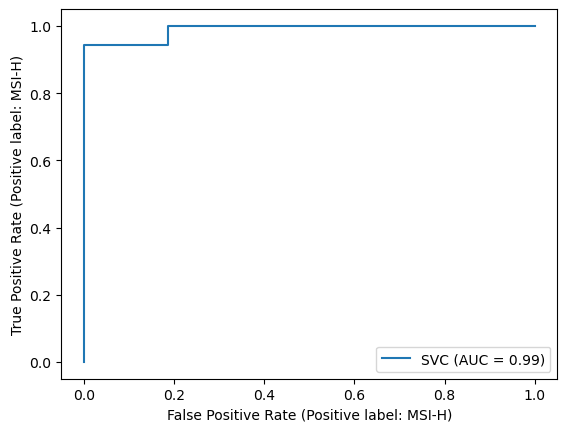

In [19]:
from sklearn.metrics import RocCurveDisplay
print(x_test_tf.shape)
svc_disp = RocCurveDisplay.from_estimator(svclassifier, x_test_tf, y_test,pos_label='MSI-H')
plt.show()